# Testing the Skirtor Models
This script is intended to be used to explore the Skirtor models that were used in Stalveski et al's 2012 paper. The models that were presented in this paper and are further explored in the 2016 paper are an exploration of a two-phase clumpy dusty torus model. Where the parameters are as follows:

L  = the luminosity of the central source

R_in = the inner radius of the torus

R_out = the outer radius of the torus

t_9.7 = the optical depth at 9.7 microns

p = the power law index of the radial gradient of dust density

q = index that sets the dust desnity gradient with respect to the polar angle

i = the inclination angle of the torus

omega = the opening angle of the torus

Filling factor = the fraction of the volume of the torus that is filled with dust

constrast = the ratio of the dust density in the clumps to the average dust density in the torus

size of clumps = the size of the clumps in the torus




# Naming Convention of Models

File name example: t5_p1_q0_oa50_R20_Mcl0.97_i30_sed.dat

t: tau9.7, average edge-on optical depth at 9.7 micron; the actual one along the line of sight may vary depending on the clumps distribution.

p: power-law exponent that sets radial gradient of dust density

q: index that sets dust density gradient with polar angle

oa: angle measured between the equatorial plan and edge of the torus. Half-opening angle of the dust-free cone is 90-oa.

R: ratio of outer to inner radius, R_out/R_in

Mcl: fraction of total dust mass inside clumps. 0.97 means 97% of total mass is inside the clumps and 3% in the interclump dust.

i: inclination, i.e. viewing angle, i.e. position of the instrument w.r.t. the AGN axis. i=0: face-on, type 1 view; i=90: edge-on, type 2 view.

In the 2012 paper the authors adopt the following values: R_in = 0.5pc, R_out = 15pc, omega = 50 degrees, optical depth of 1, and 5, p = 0, 1 and q = 0, 2, 4, constrast 100


In [287]:
# Begin by importing all relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import astropy as ap

In [288]:
# Define the naming convention for reading in the Skirtor models
# Define the path to the directory containing the models



# we need to construct the filename for the model to be read in, 
# as there is a parameter made naming convention we can use parameters to select the file


optical_depth = 7                    # This can take values 3, 5, 7, 9, 11
p = 0                               # 0, 0.5, 1, 1.5
q = 0                              # 0, 0.5, 1, 1.5
opening_angle = 80               # 10, 20, 30, 40, 50, 60, 70, 80
radius_ratio = 30                   # 10, 20, 30
clump_dustmass_fraction = 0.97 
inclination = 30                    # 0, 10, 20, 30, 40, 50, 60, 70, 80, 90


filename = 't'+str(optical_depth)+'_p'+str(p)+'_q'+str(q)+'_oa'+str(opening_angle)+'_R'+str(radius_ratio)+'_Mcl0.97_i'+str(inclination)+'_sed.dat'

# Join the file to the path and then read in the file
filepath =os.path.join('datasets', 'Templates', 'Skirtor', filename)


In [289]:
# Read in the file and convert it to a pandas dataframe
data = np.loadtxt(filepath, skiprows=5)

# Convert it to a pandas dataframe # All fluxes are of the form lambda*F_lambda
df = pd.DataFrame(data, columns=['lambda (micron)', 'Total Flux (W/m2)', 'Direct AGN Flux (W/m2)', 'Scattered AGN Flux (W/m2)', 'Total Dust Emission Flux (W/m2)', 'Dust Emission Scattered Flux(W/m2)', 'Transparent Flux(W/m2)'])


In [290]:
df.head()

,lambda (micron),Total Flux (W/m2),Direct AGN Flux (W/m2),Scattered AGN Flux (W/m2),Total Dust Emission Flux (W/m2),Dust Emission Scattered Flux(W/m2),Transparent Flux(W/m2)
0,0.001000,9.268853e-17,3.930859e-17,5.337994e-17,0.0,0.0,8.465294e-13
1,0.001148,4.934851e-17,1.883021e-18,4.746549e-17,0.0,0.0,9.991761e-13
2,0.001318,2.149967e-17,6.209469e-20,2.143757e-17,0.0,0.0,1.179348e-12
3,0.001514,1.962015e-17,3.650996e-21,1.961650e-17,0.0,0.0,1.392009e-12
4,0.001738,4.380398e-17,3.513372e-21,4.380046e-17,0.0,0.0,1.643017e-12


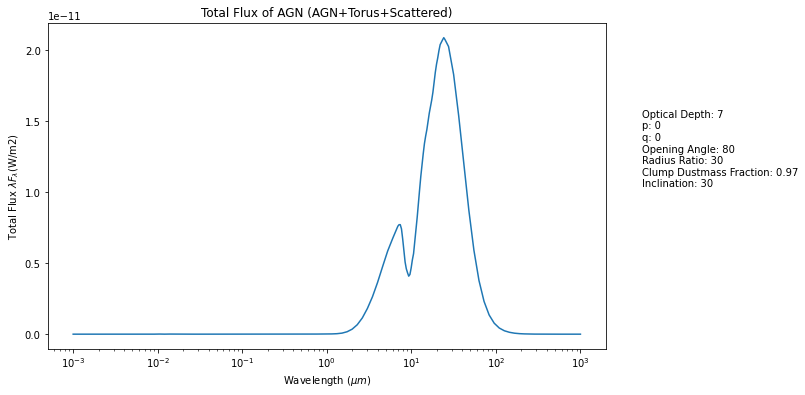

In [291]:
# Now we can plot the SED across it's wavelength range
figure = plt.figure(figsize=(10, 6))
plt.plot(df['lambda (micron)'], df['Total Flux (W/m2)'], label='Total Flux')
#plt.yscale('log')
plt.xscale('log')
plt.xlabel('Wavelength ($\mu m$)')
plt.ylabel('Total Flux $\lambda F_{\lambda }$(W/m2)')
plt.title('Total Flux of AGN (AGN+Torus+Scattered)')
# Construct legend string
legend_str = f'Optical Depth: {optical_depth}\n' \
             f'p: {p}\n' \
             f'q: {q}\n' \
             f'Opening Angle: {opening_angle}\n' \
             f'Radius Ratio: {radius_ratio}\n' \
             f'Clump Dustmass Fraction: {clump_dustmass_fraction}\n' \
             f'Inclination: {inclination}'

plt.text(0.95, 0.5, legend_str, fontsize=10, transform=plt.gcf().transFigure)
plt.show()


In [292]:
# Now we know this works, we can define a function to do this for us
def read_skirtor_model(optical_depth, p, q, opening_angle, radius_ratio, clump_dustmass_fraction, inclination):
    # Define the naming convention for reading in the Skirtor models
    filename = 't'+str(optical_depth)+'_p'+str(p)+'_q'+str(q)+'_oa'+str(opening_angle)+'_R'+str(radius_ratio)+'_Mcl0.97_i'+str(inclination)+'_sed.dat'
    # Join the file to the path and then read in the file
    filepath =os.path.join('datasets', 'Templates', 'Skirtor', filename)
    # Read in the file and convert it to a pandas dataframe
    data = np.loadtxt(filepath, skiprows=5)
    # Convert it to a pandas dataframe # All fluxes are of the form lambda*F_lambda
    df = pd.DataFrame(data, columns=['lambda (micron)', 'Total Flux (W/m2)', 'Direct AGN Flux (W/m2)', 'Scattered AGN Flux (W/m2)', 'Total Dust Emission Flux (W/m2)', 'Dust Emission Scattered Flux(W/m2)', 'Transparent Flux(W/m2)'])
    return df

# define a function to read multiple models and store them in a list
def read_multiple_skirtor_models(optical_depth_list, p_list, q_list, opening_angle_list, radius_ratio_list, inclination_list):
    # Create an empty list to store the dataframes
    df_list = []
    parameter_list = []
    # Loop through all the models and store them in the list
    for optical_depth in optical_depth_list:
        for p in p_list:
            for q in q_list:
                for opening_angle in opening_angle_list:
                    for radius_ratio in radius_ratio_list:
                        for inclination in inclination_list:
                            df_list.append(read_skirtor_model(optical_depth, p, q, opening_angle, radius_ratio, clump_dustmass_fraction, inclination))
                            # also put the parametrs into another list and return that
                            parameter_list.append([optical_depth, p, q, opening_angle, radius_ratio, inclination])
    return (df_list, parameter_list)


# Define another function for plotting these models
def plot_skirtor_model(df):
    figure = plt.figure(figsize=(10, 6))
    plt.plot(df['lambda (micron)'], df['Total Flux (W/m2)'], label='Total Flux')
    #plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('Wavelength ($\mu m$)')
    plt.ylabel('Total Flux $\lambda F_{\lambda }$(W/m2)')
    plt.title('Total Flux of AGN (AGN+Torus+Scattered)')
    # Construct legend string
    legend_str = f'Optical Depth: {optical_depth}\n' \
                 f'p: {p}\n' \
                 f'q: {q}\n' \
                 f'Opening Angle: {opening_angle}\n' \
                 f'Radius Ratio: {radius_ratio}\n' \
                 f'Clump Dustmass Fraction: {clump_dustmass_fraction}\n' \
                 f'Inclination: {inclination}'
    plt.text(0.95, 0.5, legend_str, fontsize=10, transform=plt.gcf().transFigure)
    plt.show()
    
    
# # Define a function for plotting multiple models on a multiple plot grid - df_list is a list of dataframes
# def plot_multiple_skirtor_models(df_list,parameter_list, columns, rows):
#     figure, axes = plt.subplots(columns, rows, figsize=(15, 15))
    
#     # plot each model on the grid
#     for i in range(columns):
#         for j in range(rows):
#             if i*rows + j < len(df_list):
#                 axes[i, j].plot(df_list[i*rows + j]['lambda (micron)'], df_list[i*rows + j]['Total Flux (W/m2)'], label='Total Flux')
#                 axes[i, j].set_xscale('log')
#                 axes[i, j].set_xlabel('Wavelength ($\mu m$)')
#                 axes[i, j].set_ylabel('Total Flux $\lambda F_{\lambda }$(W/m2)')
#                 axes[i, j].set_title('Total Flux of AGN (AGN+Torus+Scattered)')
#                 # Construct legend string from the parameter list
#                 legend_str = f'Optical Depth: {parameter_list[i*rows + j][0]}\n' \
#                              f'p: {parameter_list[i*rows + j][1]}\n' \
#                              f'q: {parameter_list[i*rows + j][2]}\n' \
#                              f'Opening Angle: {parameter_list[i*rows + j][3]}\n' \
#                              f'Radius Ratio: {parameter_list[i*rows + j][4]}\n' \
#                              f'Clump Dustmass Fraction: {parameter_list[i*rows + j][5]}\n' \
#                              f'Inclination: {parameter_list[i*rows + j][6]}'
#                 axes[i, j].text(0.95, 0.05, legend_str, fontsize=10, transform=ax.transAxes, 
#                         ha='right', va='bottom', bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))


def plot_multiple_skirtor_models(df_list, parameter_list, columns, rows, print_params=False):
    figure, axes = plt.subplots(columns, rows, figsize=(15, 15))
    
    # Plot each model on the grid
    for i in range(columns):
        for j in range(rows):
            # Calculate the index of the current model
            index = i * rows + j
            if index < len(df_list):
                ax = axes[i, j]  # Define ax as the current subplot
                ax.plot(df_list[index]['lambda (micron)'], df_list[index]['Total Flux (W/m2)'], label='Total Flux')
                ax.set_xscale('log')
                ax.set_xlabel('Wavelength ($\mu m$)')
                ax.set_ylabel('Total Flux $\lambda F_{\lambda }$(W/m2)')
                ax.set_title('Total Flux of AGN (AGN+Torus+Scattered)')
                
                if (print_params==True):
                    # Construct legend string from the parameter list
                    legend_str = f'Optical Depth: {parameter_list[index][0]}\n' \
                                f'p: {parameter_list[index][1]}\n' \
                                f'q: {parameter_list[index][2]}\n' \
                                f'Opening Angle: {parameter_list[index][3]}\n' \
                                f'Radius Ratio: {parameter_list[index][4]}\n' \
                                f'Clump Dustmass Fraction: {parameter_list[index][5]}\n' \
                                f'Inclination: {parameter_list[index][6]}'
                    
                    # Place the legend text on the subplot
                    ax.text(0.95, 0.05, legend_str, fontsize=10, transform=ax.transAxes, 
                            ha='right', va='bottom', bbox=dict(facecolor='white', alpha=0.1, edgecolor='black'))

    plt.tight_layout()
    plt.show()



In [293]:
# Try a few models

# Define the parameters for the models
optical_depth_list = [3, 5, 7, 9, 11]
p_list = [0, 0.5,1, 1.5]
q_list = [0, 0.5,1, 1.5]
opening_angle_list = [10, 20, 30, 40, 50, 60, 70, 80]
radius_ratio_list = [10, 20, 30]
inclination_list = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
# full parameter set: this will give us the full parameter space to explore, but this is overkill.
full_parameter_list = [optical_depth_list, p_list, q_list, opening_angle_list, radius_ratio_list, inclination_list]


# We can do a reduced parameter set, which will give us a smaller number of models to plot, specifically we will look at the following parameters:
optical_depth_list = [7]
p_list = [0,1]
q_list = [0,1]
opening_angle_list = [50]
radius_ratio_list = [30]
inclination_list = [0, 90]
# reduced parameter set: this will give us a smaller number of models to plot
reduced_parameter_list = [optical_depth_list, p_list, q_list, opening_angle_list, radius_ratio_list, inclination_list]


# This should only give us more models to plot using the reduced parameter set * is unpacking notation
(df_list, parameter_list) = read_multiple_skirtor_models(*reduced_parameter_list)


# The mathematical equation to work out the number of rows and columns is:
# n = number of models
# columns = sqrt(n)
# rows = n / columns
# If rows is not an integer, then increment columns by 1 and recalculate rows
n = len(df_list)
columns = int(np.sqrt(n))
rows = int(n / columns)
if n % columns != 0:
    columns += 1
    rows = int(n / columns)

print(n)    


8


In [294]:
# Plot these models
#plot_multiple_skirtor_models(df_list, parameter_list, rows,columns, False)
